In [31]:
import pandas
import scipy.sparse
import scipy.sparse.linalg
import numpy
import igl
import meshio
# import betterspy

In [32]:
def read_matrix_from_csv(path):
    _, *shape = pandas.read_csv(path, header=None).loc[0]
    shape = [int(s) for s in shape]
    df = pandas.read_csv(path, skiprows=1)
    return scipy.sparse.coo_matrix((df["Val"], (df["Row"], df["Col"])), shape=shape).tocsc()

In [33]:
def describe(a):
    print(pandas.DataFrame(a).describe())

def describe_eigvals(M):
    if scipy.sparse.issparse(M):
        M = M.A
    describe(sorted(abs(numpy.linalg.eigvals(M))))

In [34]:
# betterspy.show(M)
# betterspy.write_png(
#     "out.png",
#     M,
#     # border_width=2,
#     # border_color="red",
#     # colormap="viridis"
# )

In [35]:
M = read_matrix_from_csv("M.csv")
A = read_matrix_from_csv("A.csv")

In [40]:
M.A[:8, :8].round(3)

array([[0.003, 0.   , 0.002, 0.   , 0.002, 0.   , 0.   , 0.   ],
       [0.   , 0.003, 0.   , 0.002, 0.   , 0.002, 0.   , 0.   ],
       [0.002, 0.   , 0.007, 0.   , 0.003, 0.   , 0.002, 0.   ],
       [0.   , 0.002, 0.   , 0.007, 0.   , 0.003, 0.   , 0.002],
       [0.002, 0.   , 0.003, 0.   , 0.007, 0.   , 0.002, 0.   ],
       [0.   , 0.002, 0.   , 0.003, 0.   , 0.007, 0.   , 0.002],
       [0.   , 0.   , 0.002, 0.   , 0.002, 0.   , 0.003, 0.   ],
       [0.   , 0.   , 0.   , 0.002, 0.   , 0.002, 0.   , 0.003]])

In [45]:
(1000*(M.A[:8, :8] - A.A[:8, :8])).round(3)

array([[1.667, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 1.667, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 3.333, 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 3.333, 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 3.333, 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 3.333, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.667, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.667]])

In [83]:
print(M.A)
# M.shape
# M = M.A
B=  M.A[::2, ::2]
print(numpy.linalg.matrix_rank(M.A))
B

[[0.00333333 0.         0.00166667 0.         0.00166667 0.        ]
 [0.         0.00333333 0.         0.00166667 0.         0.00166667]
 [0.00166667 0.         0.00333333 0.         0.00166667 0.        ]
 [0.         0.00166667 0.         0.00333333 0.         0.00166667]
 [0.00166667 0.         0.00166667 0.         0.00333333 0.        ]
 [0.         0.00166667 0.         0.00166667 0.         0.00333333]]
6


array([[0.00333333, 0.00166667, 0.00166667],
       [0.00166667, 0.00333333, 0.00166667],
       [0.00166667, 0.00166667, 0.00333333]])

In [89]:
sorted(abs(numpy.linalg.eigvals(M.A)))

[0.0016666666666666997,
 0.0016666666666667,
 0.0016666666666667002,
 0.0016666666666667008,
 0.006666666666666499,
 0.0066666666666665]

In [43]:
rhs = M @ numpy.ones(M.shape[0])

In [44]:
numpy.linalg.det(M.A)

0.0

In [34]:
describe_eigvals(M)

                  0
count  2.160000e+02
mean   9.815460e+03
std    1.438759e+04
min    0.000000e+00
25%    8.614908e-13
50%    1.938683e+03
75%    1.569117e+04
max    6.388889e+04


In [45]:
describe_eigvals(M.T @ M)

                  0
count  2.160000e+02
mean   3.023878e+08
std    6.560162e+08
min    0.000000e+00
25%    3.284358e-08
50%    7.516987e+06
75%    2.716761e+08
max    4.081790e+09


In [36]:
MA = M.A
MA[0, :] = 0
MA[:, 0] = 0
MA[0, 0] = 1
describe_eigvals(MA)

                  0
count  2.160000e+02
mean   9.749094e+03
std    1.429977e+04
min    2.337671e-14
25%    1.170052e-12
50%    1.939183e+03
75%    1.495976e+04
max    6.388889e+04


In [49]:
help(igl.massmatrix)

Help on built-in function massmatrix in module igl.pyigl:

massmatrix(...) method of builtins.PyCapsule instance
    massmatrix(v: array, f: array, type: int = 1) -> object
    
    
    Constructs the mass (area) matrix for a given mesh (V,F).
    
    Parameters
    ----------
    v : #v by dim list of mesh vertex positions
    f : #f by simplex_size list of mesh faces (must be triangles)
    type : one of the following types:
           -igl.MASSMATRIX_TYPE_BARYCENTRIC  barycentric
           -igl.MASSMATRIX_TYPE_VORONOI voronoi-hybrid (default)
           -igl.MASSMATRIX_TYPE_FULL full (not implemented)
    
    Returns
    -------
    m : #v by #v mass matrix
    
    See also
    --------
    adjacency_matrix, cotmatrix, grad
    
    Notes
    -----
    
    Examples
    --------



In [73]:
mesh = meshio.read("arch.vtu")
V = mesh.points.astype(float)
F = mesh.cells[0].data.astype(int)
V, I, J, F = igl.remove_duplicate_vertices(V, F, 0)
V.shape[0] * 2 == M.shape[0]

True

In [87]:
M_igl = igl.massmatrix(V, F)
describe_eigvals(M_igl)

                0
count  108.000000
mean    12.802774
std      3.775277
min      5.668952
25%     10.922695
50%     12.058090
75%     13.322315
max     25.000000


In [ ]:
M

In [48]:
from quadpy import *

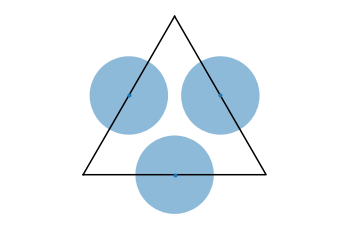

(0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.041666666666666664,
 0.041666666666666664,
 0.041666666666666664)

In [49]:
scheme = t2.get_good_scheme(2)
scheme.show()
val0 = scheme.integrate(lambda x: x[0] * x[0], [[0.0, 0.0], [1.0, 0.0], [0.0, 1.0]])
val1 = scheme.integrate(lambda x: x[1] * x[1], [[0.0, 0.0], [1.0, 0.0], [0.0, 1.0]])
val2 = scheme.integrate(lambda x: (1-x[0]-x[1])**2, [[0.0, 0.0], [1.0, 0.0], [0.0, 1.0]])
val3 = scheme.integrate(lambda x: x[0] * x[1], [[0.0, 0.0], [1.0, 0.0], [0.0, 1.0]])
val4 = scheme.integrate(lambda x: (1-x[0]-x[1]) * x[0], [[0.0, 0.0], [1.0, 0.0], [0.0, 1.0]])
val5 = scheme.integrate(lambda x: (1-x[0]-x[1]) * x[1], [[0.0, 0.0], [1.0, 0.0], [0.0, 1.0]])
val0, val1, val2, val3, val4, val5

In [50]:
M2 = numpy.array([[val0, val3, val4], 
 [val3, val1, val5],
 [val4, val5, val2]])
M2

array([[0.08333333, 0.04166667, 0.04166667],
       [0.04166667, 0.08333333, 0.04166667],
       [0.04166667, 0.04166667, 0.08333333]])

In [63]:
numpy.linalg.det(M2)

0.0002893518518518517

```
0.00333333          0 0.00166667          0 0.00166667          0
         0 0.00333333          0 0.00166667          0 0.00166667
0.00166667          0 0.00333333          0 0.00166667          0
         0 0.00166667          0 0.00333333          0 0.00166667
0.00166667          0 0.00166667          0 0.00333333          0
         0 0.00166667          0 0.00166667          0 0.00333333
```